In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ypstruct import structure
from mpl_toolkits.mplot3d import Axes3D
import math


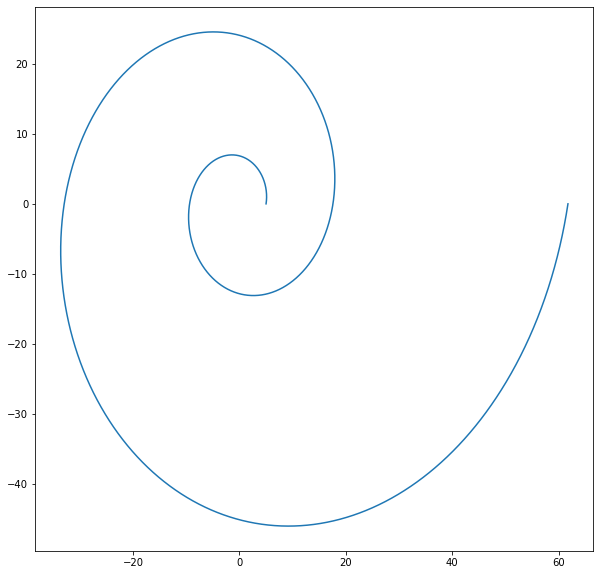

[0.00000000e+00 1.25676274e-03 2.51352548e-03 ... 1.25638571e+01
 1.25651139e+01 1.25663706e+01]


In [201]:
theta = np.radians(np.linspace(0,2*360,10000))
# r = theta**2
a =5
b = 0.2
r=a*np.exp(b*theta)
x = r*np.cos(theta)
y = r*np.sin(theta)
plt.figure(figsize=[10,10])
plt.plot(x,y)
plt.show()
print(theta)

In [35]:
#sphere test function
def sphere(x,y):    
    s=x**2 + y**2
    return s
def Ackley(x, y):
    return -20.0 * np.exp(-0.2 * np.sqrt(0.5 * (x**2 + y**2))) - np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))) + np.e + 20


In [198]:
#calculate heat radiation (Eq. 6);
def heat_radiatiin(t):
    A=0.56 #مساحت یک پنگوئن
    e=0.98  #emissivity of bird plumage
    delta= (5.6703 * math.pow(10,-8)) #Stefan–Boltzmann constant
    factor=0.004
    return (factor* A*e*delta*math.pow(t+273,4))

def distance(x,y):
    x1 =x[0]
    y1= x[1]
    x2= y[0]
    y2=y[1]
    dist=math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 )
    
    return dist

#calculate attractiveness (Eq .11)
def attractiveness(heatRadiation,x):
    mu = 0.1 #attenuation coefficient ????
    Q = heatRadiation*math.exp(-1*mu*x)
    return Q
    
#calculate coordinated spiral movement (Eq. 18);
def  coordinated_spiral_movement(pi , pj ,Q):
    xi=pi[0]
    yi=pi[1]
    xj=pj[0]
    yj= pj[1]
    
    
    a = 2   #مقدار a , b  با توجه به نمودار اول
    b = 0.2   #??
    phi = 1 #?? mutation factor
    epsilon= np.random.uniform(0,1,1)[0]
    
    t1=(1-Q)*math.exp(b*math.atan(yi/xi))  + Q* math.exp(b*math.atan(yj/xj))
    
    xk = a*math.exp( math.log(t1))  * math.cos((math.log(t1))/b)
    yk = a*math.exp( math.log(t1))  * math.sin((math.log(t1))/b)
    
    f1 = math.cos((1/b)*((1-Q)*math.exp(b*math.atan(yi/xi)) +Q*math.exp(b*math.atan(yj/xj))))
    f2 = a*math.exp(math.log((1-Q)*math.exp(b*math.atan(yi/xi)) + Q * math.exp(b*math.atan(yj/xj))))
    f3 = math.sin((1/b)*((1-Q)*math.exp(b*math.atan(yi/xi)) +Q*math.exp(b*math.atan(yj/xj))))
    
    Xk = xk
    Yk = yk 
    return(Xk,Yk)
    
    

[-20.28105897  -5.8229804 ]


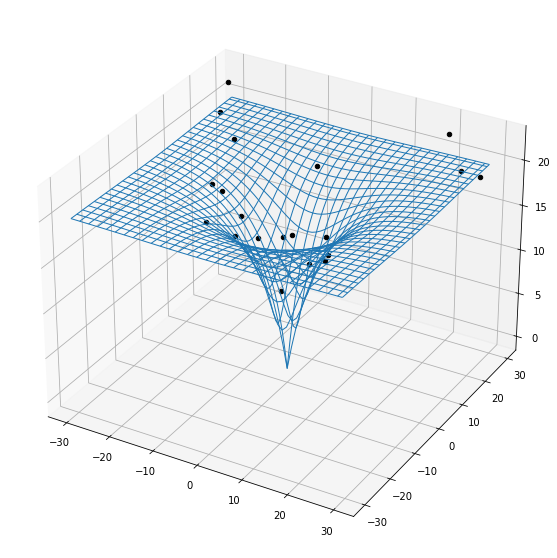

In [199]:
#Problem Defination

# costfunc= sphere
costfunc=Ackley

nvar=2        # number of decision Variable
varmin=-30     #فضای جست و جو
varmax=30

#GWO Parameters
maxit=21  #number of maximo  itiriation
npop=20    #تعداد جمعیت دسته

    
#EmpteIndividual Template
empty_indevidual= structure()
empty_indevidual.position=None
# empty_indevidual.cost=float('inf')
empty_indevidual.cost=100000
    
#Initialze population -generate initial population array of EPs (Colony Size)
pop=empty_indevidual.repeat(npop)  
warmPenguin = empty_indevidual.deepcopy()

#plot 
fig=plt.figure(figsize=(20,10))
fig.clf()
ax = plt.axes(projection="3d")
x= np.arange(varmin,varmax,1)
y=np.arange(varmin,varmax,1)
x,y=np.meshgrid(x,y)
# temperture=costfunc(np.stack((x,y),axis=0))
temperture = costfunc(x, y)

surf=ax.plot_wireframe(x,y,temperture ,linewidth=1)

#توزیع پنگوین ها به طور اتفاقی
for i in range(npop):
    pop[i].position=np.random.uniform(varmin,varmax, nvar) #generate position of each EP;
    pop[i].cost=costfunc(pop[i].position[0],pop[i].position[1])     #generate position of each EP;
    #plot 
    ax.scatter(pop[i].position[1],pop[i].position[0], pop[i].cost,c='k', s=20)

#     #update warmPenguin
#     if pop[i].cost <warmPenguin.cost :
#         warmPenguin=pop[i].deepcopy()
    
# #نمایش پنگوین گرم روی  فضای جست و جو
# ax.scatter(warmPenguin.position[1],warmPenguin.position[0], warmPenguin.cost,c='r', s=200)

print(pop[2].position)


<ipython-input-200-2063962c44c3>:53: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(maxit+1, 1, it/3+2, projection='3d')


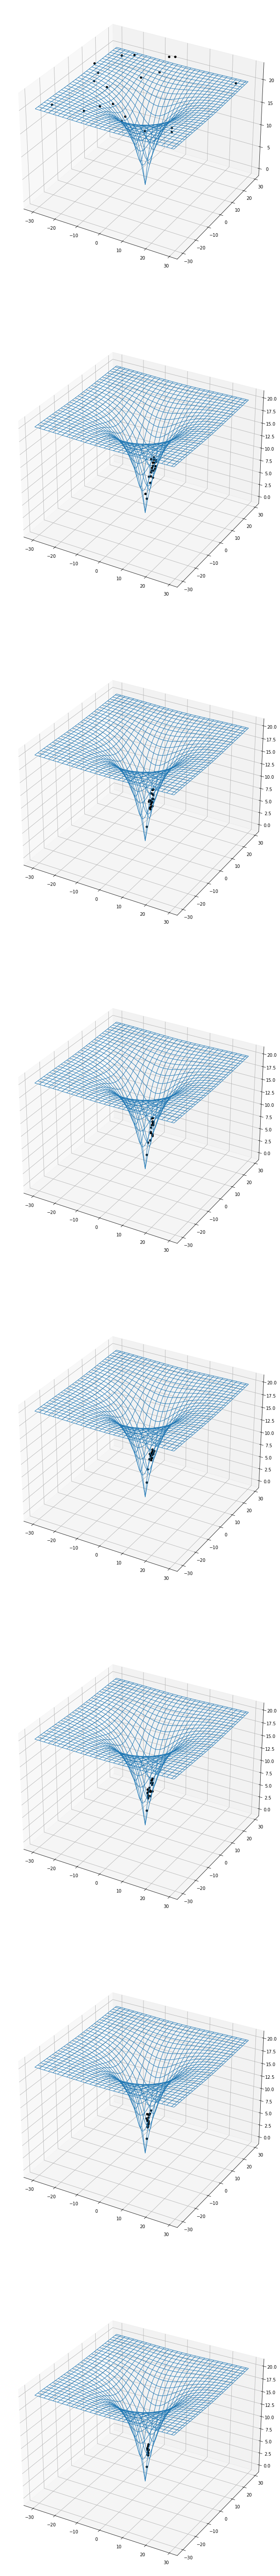

In [200]:

#main
fig=plt.figure(figsize=(20,300))
fig.clf()
ax = fig.add_subplot(maxit+1, 1, 1, projection='3d')
x= np.arange(varmin,varmax,1)
y=np.arange(varmin,varmax,1)
x,y=np.meshgrid(x,y)
# temperture=costfunc(np.stack((x,y),axis=0))
temperture = costfunc(x, y)

surf=ax.plot_wireframe(x,y,temperture ,linewidth=1)

#توزیع پنگوین ها به طور اتفاقی
for i in range(npop):
    pop[i].position=np.random.uniform(varmin,varmax, nvar) #generate position of each EP;
    pop[i].cost=costfunc(pop[i].position[0],pop[i].position[1])     #generate position of each EP;
    #plot 
    ax.scatter(pop[i].position[1],pop[i].position[0], pop[i].cost,c='k', s=20)
NFE = 0
BestCost = np.zeros([maxit])
for it in range(maxit):
    mutaionFactor = 2- it*(2/maxit)
    NFE+=npop
    for i in range(npop):
        for j in range(npop):
            if pop[j].cost < pop[i].cost:
                dist= distance(pop[j].position,pop[i].position)
                heat=heat_radiatiin(pop[j].cost) #calculate heat radiation (Eq. 6) 
                attracti = attractiveness(heat,dist) #calculate attractiveness (Eq .11);
#                 print(attracti)
                
                
                #calculate coordinated spiral movement (Eq. 18);
                x , y = coordinated_spiral_movement(pop[i].position,pop[j].position,attracti*2)
                x = x   + mutaionFactor*np.random.uniform(0,1,1)[0]
                y = y  + mutaionFactor*np.random.uniform(0,1,1)[0]
                pop[i].position=np.array([x,y])
                pop[i].position[pop[i].position > varmax] = varmax
                pop[i].position[pop[i].position < varmin] = varmin
                pop[i].cost=costfunc(pop[i].position[0],pop[i].position[1])
                if pop[i].cost < warmPenguin.cost:
#                     print('best cost changed')
                    warmPenguin=pop[i].deepcopy()
#                     print(warmPenguin.cost)
              
    BestCost[it]=warmPenguin.cost
#     print('Itration= ', it , '  | NFE =' , NFE , '| BestCost= ',BestCost[it])
#plot 
  

    if (it%3 ==0):
        
        ax = fig.add_subplot(maxit+1, 1, it/3+2, projection='3d')
        x= np.arange(varmin,varmax,1)
        y=np.arange(varmin,varmax,1)
        x,y=np.meshgrid(x,y)
        # temperture=costfunc(np.stack((x,y),axis=0))
        temperture = costfunc(x, y)
        surf=ax.plot_wireframe(x,y,temperture ,linewidth=1)
        for i in range(npop):
            ax.scatter(pop[i].position[1],pop[i].position[0], pop[i].cost,c='k', s=20)


    

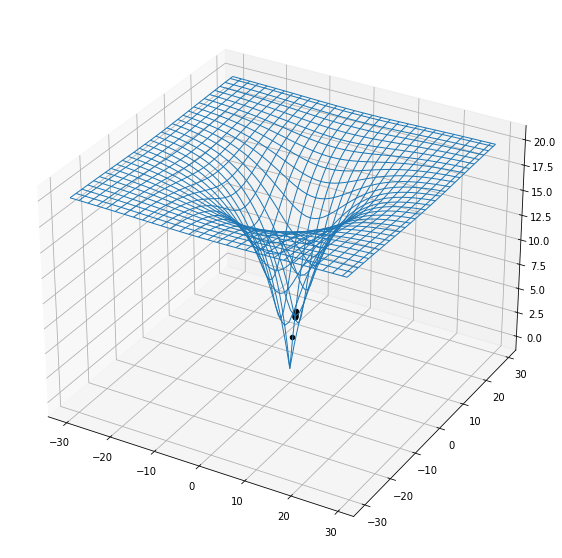

In [190]:

#plot 
fig=plt.figure(figsize=(20,10))
fig.clf()
ax = plt.axes(projection="3d")
x= np.arange(varmin,varmax,1)
y=np.arange(varmin,varmax,1)
x,y=np.meshgrid(x,y)
# temperture=costfunc(np.stack((x,y),axis=0))
temperture = costfunc(x, y)
surf=ax.plot_wireframe(x,y,temperture ,linewidth=1)

for i in range(npop):
    ax.scatter(pop[i].position[1],pop[i].position[0], pop[i].cost,c='k', s=20)

In [61]:
for i in range(npop):
    print(pop[i].cost)

16.603913470007463
15.801504635588772
15.836520081651562
16.583482826982024
14.6335527969466
16.355493230673275
15.709802529916065
15.029970413409972
10.971718072606748
14.577266170449906
15.164503350989278
15.369298125505615
14.927570735991418
14.796850749009709
15.813324420354128
16.45222352042469
16.59308909143633
15.982546703566452
15.356328082311624
15.072405382887117


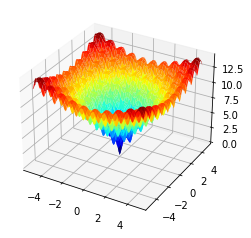

In [8]:


# objective function
def objective(x, y):
    return -20.0 * np.exp(-0.2 * np.sqrt(0.5 * (x**2 + y**2))) - np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))) + np.e + 20

# define range for input
r_min, r_max = -5.0, 5.0
# sample input range uniformly at 0.1 increments
xaxis = np.arange(r_min, r_max, 0.1)
yaxis = np.arange(r_min, r_max, 0.1)
# create a mesh from the axis
x, y = np.meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a surface plot with the jet color scheme
figure =plt.figure()
axis = figure.gca(projection='3d')
axis.plot_surface(x, y, results, cmap='jet')
# show the plot
plt.show()

In [9]:

# r1=0.56  * 0.98 * 5.6703 * math.pow(10,-8)
# print (' A.e.sigma = ', r1)
# r2=math.pow(300,4)
# print('T ^ 4 = ',r2)
# print('Q1 = ', r1*r2)
# print('Q = ', r1*r2*math.exp(-0.03*10)*0.01)
heat= heat_radiatiin(5)
print('heat: ', heat)
print('atrrctivness: ', attractiveness(heat,2))


heat:  0.1858657306174282
atrrctivness:  0.1521739895997963
